# Import Data Set

In [35]:
#Importing and packages management logistics
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

import pandas_profiling as p2
import seaborn as sb
import itertools
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, learning_curve, ShuffleSplit, cross_validate, cross_val_score, validation_curve
from sklearn.metrics import accuracy_score, f1_score, classification_report, cohen_kappa_score, mean_squared_error, confusion_matrix, roc_curve, auc, make_scorer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import neighbors, datasets, linear_model
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, learning_curve
from sklearn.linear_model import LogisticRegression, LogisticRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [1]:
import pandas as pd
df = pd.read_excel("C:\\Users\\ivyzh\\Desktop\\ISOM 672 - Intro to BA\\HW4\\HW4.xlsx")
print(df.shape)
df.head()

(2000, 25)


,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
0,1,1,0,0,1,0,0,0,0,0,...,0,0,2,3662,3662,1,0,1,1,127.87
1,2,1,0,0,0,0,1,0,0,0,...,0,0,0,2900,2900,1,1,0,0,0.00
2,3,1,0,0,0,0,0,0,0,0,...,0,0,2,3883,3914,0,0,0,1,127.48
3,4,1,0,1,0,0,0,0,0,0,...,0,0,1,829,829,0,1,0,0,0.00
4,5,1,0,1,0,0,0,0,0,0,...,0,0,1,869,869,0,0,0,0,0.00


# Explore the Data

In [2]:
############################################ Data Visualization############################################

# Libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['Freq','last_update_days_ago','1st_update_days_ago','Spending']
sns.pairplot(df[cols], size=2.5)             
#plt.tight_layout()                           
             
plt.show() 

C:\Users\ivyzh\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1000x1000 with 20 Axes>

In [10]:
# descriptive statistics 
df.describe()

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,0.824500,0.126500,0.056000,0.060000,0.041500,0.151000,0.01650,0.033500,0.052500,...,0.018000,0.137500,1.417000,2155.101000,2435.601500,0.426000,0.524500,0.221000,0.500000,102.560745
std,577.494589,0.380489,0.332495,0.229979,0.237546,0.199493,0.358138,0.12742,0.179983,0.223089,...,0.132984,0.344461,1.405738,1141.302846,1077.872233,0.494617,0.499524,0.415024,0.500125,186.749816
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1133.000000,1671.250000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1000.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,1.000000,2280.000000,2721.000000,0.000000,1.000000,0.000000,0.500000,1.855000
75%,1500.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,2.000000,3139.250000,3353.000000,1.000000,1.000000,0.000000,1.000000,152.532500
max,2000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,15.000000,4188.000000,4188.000000,1.000000,1.000000,1.000000,1.000000,1500.060000


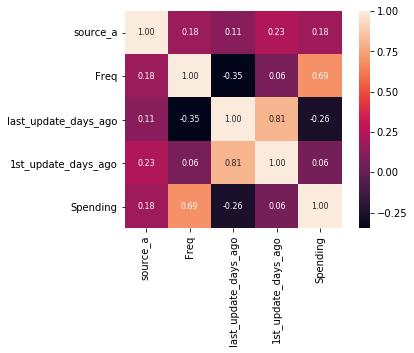

<Figure size 720x720 with 0 Axes>

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt

cols = ['source_a'] + cols 
cm = np.corrcoef(df[cols].values.T)
hm = sns.heatmap(cm,                # Plot rectangular data as a color-encoded matrix
                 cbar=True,         # Whether to draw a colorbar.
                 annot=True,        # If True, write the data value in each cell.
                 square=True,       # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 fmt='.2f',         # String formatting code to use when adding annotations.
                 annot_kws={'size': 8}, # Keyword arguments for ax.text when annot is True
                 yticklabels=cols,  # If True, plot the column names of the dataframe.
                 xticklabels=cols)

#plt.tight_layout()
# plt.savefig('correlation_coefficient.png', dpi=300) # Saves the figure in our local disk
plt.figure(figsize = (10,10))
plt.show()

In [9]:
# Drop the purchase column due to data leakage
df = df.drop(columns = ['Purchase'])
# Drop the sequence number because it is not necessary in regression
df = df.drop(columns = ['sequence_number'])
print(df)

      US  source_a  source_c  source_b  source_d  source_e  source_m  \
0      1         0         0         1         0         0         0   
1      1         0         0         0         0         1         0   
2      1         0         0         0         0         0         0   
3      1         0         1         0         0         0         0   
4      1         0         1         0         0         0         0   
5      1         0         0         0         0         0         0   
6      1         0         0         0         0         0         0   
7      1         0         0         1         0         0         0   
8      1         1         0         0         0         0         0   
9      1         1         0         0         0         0         0   
10     1         0         0         0         0         0         0   
11     1         0         0         0         0         0         0   
12     1         0         0         0         0         0      

In [10]:
# Define x and y
X = df.iloc[:, :-1].values # Use all features as attributes except last column
y = df['Spending'].values  

# Basic Model Building (a)

## Linear Regression

In [11]:
################################### Fit a Linear Regression Model ###################################
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split 

np.random.seed(42)

slr = LinearRegression()    # Linear Regression class

# Use the negative mean squared error as scoring criterion
scores = cross_val_score(slr, X, y, cv=10, scoring = 'neg_mean_squared_error') 
# Change the negative MSE to RMSE by take the nagtive and square root the result
rmse = (-scores)**(0.5)
print("RMSE: %0.2f (+/- %0.2f)" % (rmse.mean(), rmse.std() * 2)) 

RMSE: 125.55 (+/- 49.98)


## Tree Regrssion

In [12]:
#################################### Regressor Tree - Numeric Prediction (NTK) ####################################
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import cross_val_score

tree = DecisionTreeRegressor(random_state = 42)
tree.fit(X, y)

# Use the negative mean squared error as scoring criterion
scores = cross_val_score(tree, X, y, cv=10, scoring = 'neg_mean_squared_error') 
# Change the negative MSE to RMSE by take the nagtive and square root the result
rmse = (-scores)**(0.5)
print("RMSE: %0.2f (+/- %0.2f)" % (rmse.mean(), rmse.std() * 2)) 

RMSE: 158.11 (+/- 58.78)


## KNN

In [13]:
#################################### kNN - Numeric Prediction (NTK) ####################################
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)
np.random.seed(42)

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor()

# Use the negative mean squared error as scoring criterion
scores = cross_val_score(knn, X_std, y, cv=10, scoring = 'neg_mean_squared_error') 
# Change the negative MSE to RMSE by take the nagtive and square root the result
rmse = (-scores)**(0.5)
print("RMSE: %0.2f (+/- %0.2f)" % (rmse.mean(), rmse.std() * 2)) 

RMSE: 143.63 (+/- 51.84)


# Feature Engineering

## Data Tranformation for Linear Regression

In [21]:
df_new = df
df_new = df.drop(columns = ['Spending'])
df_new['duration'] = df_new['1st_update_days_ago'] - df_new['last_update_days_ago']
df_new['purchase_gap'] = df_new['duration']/(df_new['Freq'] + 1/3)
df_new = df_new.drop(columns = ['duration'])
df_new.head()

,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,...,source_p,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,purchase_gap
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,2,3662,3662,1,0,1,0.000000
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,2900,2900,1,1,0,0.000000
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,2,3883,3914,0,0,0,13.285714
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,829,829,0,1,0,0.000000
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,869,869,0,0,0,0.000000


In [22]:
# Define the transformed X
X_trans = df_new
X_trans.head()

,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,...,source_p,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,purchase_gap
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,2,3662,3662,1,0,1,0.000000
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,2900,2900,1,1,0,0.000000
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,2,3883,3914,0,0,0,13.285714
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,829,829,0,1,0,0.000000
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,869,869,0,0,0,0.000000


(array([1620.,   66.,   27.,   30.,   31.,   23.,   31.,   20.,   16.,
          28.,   22.,   22.,   15.,   13.,   10.,    7.,    6.,    7.,
           2.,    4.]),
 array([   0.  ,  200.25,  400.5 ,  600.75,  801.  , 1001.25, 1201.5 ,
        1401.75, 1602.  , 1802.25, 2002.5 , 2202.75, 2403.  , 2603.25,
        2803.5 , 3003.75, 3204.  , 3404.25, 3604.5 , 3804.75, 4005.  ]),
 <a list of 20 Patch objects>)

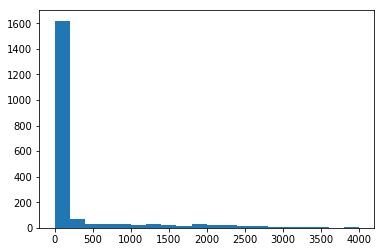

In [170]:
plt.hist(df_new['duration'], bins = 20)

In [18]:
df_new['log_duration'] = np.log(df_new['1st_update_days_ago']-df_new['last_update_days_ago'] + 1/3)
df_new.head()

,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,purchase_gap,log_duration
0,1,0,0,1,0,0,0,0,0,0,...,0,0,2,3662,3662,1,0,1,0.000000,-1.098612
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,2900,2900,1,1,0,0.000000,-1.098612
2,1,0,0,0,0,0,0,0,0,0,...,0,0,2,3883,3914,0,0,0,13.285714,3.444682
3,1,0,1,0,0,0,0,0,0,0,...,0,0,1,829,829,0,1,0,0.000000,-1.098612
4,1,0,1,0,0,0,0,0,0,0,...,0,0,1,869,869,0,0,0,0.000000,-1.098612


(array([  8.,   2.,   5.,  16.,   7.,  46.,  90.,  81.,  36.,  38.,  37.,
         53.,  36.,  67.,  76., 109.,  26.,   0.,   0.,   0.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ]),
 <a list of 20 Patch objects>)

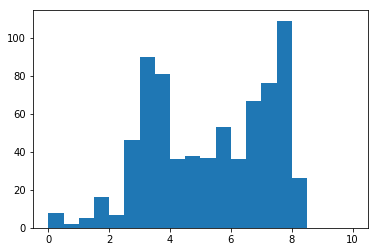

In [180]:
plt.hist(df_new['log_duration'],bins = 20,range = [0,10])

## Apply to Model

In [187]:
################################# Linear Regression ################################################
scores = cross_val_score(slr, X_trans, y, cv=10, scoring = 'neg_mean_squared_error') 
# Change the negative MSE to RMSE by take the nagtive and square root the result
rmse = (-scores)**(0.5)
print("RMSE: %0.2f (+/- %0.2f)" % (rmse.mean(), rmse.std() * 2)) 

RMSE: 124.45 (+/- 50.28)


In [23]:
################################# Tree Regression ##################################################
scores = cross_val_score(tree, X_trans, y, cv=10, scoring = 'neg_mean_squared_error') 
# Change the negative MSE to RMSE by take the nagtive and square root the result
rmse = (-scores)**(0.5)
print("RMSE: %0.2f (+/- %0.2f)" % (rmse.mean(), rmse.std() * 2)) 

RMSE: 163.46 (+/- 58.21)


In [128]:
#################################### Regressor Tree - Nested CV (NTK) ####################################

# Find optimal paramater for DecisionTreeRegressor with GridSearchCV
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")

# Find the max_depth that minimizes MSE
# Inner CV
parameters = {'max_depth':range(3,50)}      # range of parameters for the depth of the tree
gs_dt = GridSearchCV(DecisionTreeRegressor(), parameters, n_jobs=4) #GridSearchCV
gs_dt.fit(X, y) # Fit model

gs_dt = gs_dt.fit(X,y)
print(" Parameter Tuning")
print("Non-nested Performance: ", gs_dt.best_score_)
print("Optimal Parameter: ", gs_dt.best_params_)    # Parameter setting that gave the best results on the hold out data.
print("Optimal Estimator: ", gs_dt.best_estimator_) # Estimator that was chosen by the search, i.e. estimator which gave highest score
# Outer CV
nested_score_gs_dt = cross_val_score(gs_dt, X=X, y=y, cv=outer_cv)
print("Nested CV Performance: ",nested_score_gs_dt.mean(), " +/- ", nested_score_gs_dt.std())

 Parameter Tuning
Non-nested Performance:  0.4038295182169719
Optimal Parameter:  {'max_depth': 5}
Optimal Estimator:  DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
Nested CV Performance:  0.43958554970157654  +/-  0.1066933113201176


In [127]:
np.random.seed(42)

X = df_new.values

slr = LinearRegression()    # Linear Regression class
slr.fit(X_train, y_train)   # Fit Model to data

# Use the negative mean squared error as scoring criterion
scores = cross_val_score(slr, X, y, cv=10, scoring = 'neg_mean_squared_error') 
# Change the negative MSE to RMSE by take the nagtive and square root the result
rmse = (-scores)**(0.5)
print("RMSE: %0.2f (+/- %0.2f)" % (rmse.mean(), rmse.std() * 2)) 

RMSE: 125.57 (+/- 49.81)


In [ ]:
#df_new = df
#df_new = df.drop(columns = ['Spending'])
#df_new['duration'] = df_new['1st_update_days_ago'] - df_new['last_update_days_ago']
#df_new = df.drop(columns = ['last_update_days_ago','1st_update_days_ago'])
# df_new['percent'] = df_new['1st_update_days_ago']/(df_new['Freq'] + 0.0001)
# df_new['source_b'] = df_new['source_b'] /10

# Parameter Tuning

In [44]:
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score 
from sklearn import neighbors, datasets, linear_model

#10-fold cross validation
np.random.seed(42)
inner_cv = KFold(n_splits=10, shuffle=True, random_state=42)
outer_cv = KFold(n_splits=10, shuffle=True, random_state=42)


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

#LR GSCV
gs_lr = GridSearchCV(estimator = linear_model.LinearRegression(normalize = True, copy_X = True),
                  param_grid=[{}], cv=inner_cv)

gs_lr = gs_lr.fit(X_train, Y_train)  
print("[[Parameter Tuning - Linear]]")
print("Non-nested CV: ", gs_lr.best_score_)
print("Optimal Parameter: ", gs_lr.best_params_)
print("Optimal Estimator: ", gs_lr.best_estimator_)

Y_train_pred = gs_lr.best_estimator_.predict(X_train)
Y_test_pred = gs_lr.best_estimator_.predict(X_test)

print('[KFold CV Test]')
CVScore(gs_knn, X_train, Y_train, cv=inner_cv)

print('\n[Hold-Out Test]')
HOScore(Y_train, Y_train_pred, Y_test, Y_test_pred)

[[Parameter Tuning - Linear Regression]]
Non-nested CV:  0.5002840460257638

[KFold CV Test]
Nested CV (RMSE):  128.33502301665143  ±  18.968016826967244
Nested CV (MAPE):  208.42297660329268  ±  41.281708248114505
Nested CV (MAE):  77.87561439995503  ±  6.222660873386625
Nested CV (AE):  0.047360006002942615  ±  12.006463614277683

[Hold-Out Test]
RMSE train: 125.9247, test: 127.8315
MAE train: 76.3501, test: 73.3613
MAPE train: 205.0398, test: 179.8105
AE train: -0.0000, test: 4.5966
[[Parameter Tuning - Lasso]]
Non-nested CV:  0.5002840460257638
Optimal Parameter:  {}
Optimal Estimator:  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

[KFold CV Test]
Nested CV (RMSE):  128.33502301665143  ±  18.968016826967244
Nested CV (MAPE):  208.42297660329268  ±  41.281708248114505
Nested CV (MAE):  77.87561439995503  ±  6.222660873386625
Nested CV (AE):  0.047360006002942615  ±  12.006463614277683

[Hold-Out Test]
RMSE train: 125.9247, test: 127.8315
MAE train: 

In [48]:
#Tree GSCV
min_samples_leaf = [i for i in range(15,90,15)]
min_samples_split = [i for i in range(50, 750, 50)]
max_depth = [1,2,3,4,5,6,7,None]
gs_dt = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
                  param_grid=[{'max_depth':max_depth,
                              'min_samples_leaf':min_samples_leaf, 'min_samples_split':min_samples_split}], 
                     cv=inner_cv, verbose = 1)

gs_dt = gs_dt.fit(X_train, Y_train)  
print("[[Parameter Tuning - Tree]]")
print("Non-nested CV F1: ", gs_dt.best_score_)
print("Optimal Parameter: ", gs_dt.best_params_)
print("Optimal Estimator: ", gs_dt.best_estimator_)

print('\n[KFold CV Test]')
CVScore(gs_dt, X, y, cv=inner_cv)

print('\n[Hold-Out Test]')
HOScore(Y_train, Y_train_pred, Y_test, Y_test_pred)

Fitting 10 folds for each of 560 candidates, totalling 5600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5600 out of 5600 | elapsed:   10.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[Parameter Tuning - Tree]]
Non-nested CV F1:  0.43052815268072037
Optimal Parameter:  {'max_depth': 6, 'min_samples_leaf': 30, 'min_samples_split': 100}
Optimal Estimator:  DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=30,
                      min_samples_split=100, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

[KFold CV Test]
Fitting 10 folds for each of 560 candidates, totalling 5600 fits


[Parallel(n_jobs=1)]: Done 5600 out of 5600 | elapsed:   12.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 560 candidates, totalling 5600 fits


[Parallel(n_jobs=1)]: Done 5600 out of 5600 | elapsed:   13.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 560 candidates, totalling 5600 fits


[Parallel(n_jobs=1)]: Done 5600 out of 5600 | elapsed:   13.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 560 candidates, totalling 5600 fits


[Parallel(n_jobs=1)]: Done 5600 out of 5600 | elapsed:   11.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 560 candidates, totalling 5600 fits


[Parallel(n_jobs=1)]: Done 5600 out of 5600 | elapsed:   13.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 560 candidates, totalling 5600 fits


[Parallel(n_jobs=1)]: Done 5600 out of 5600 | elapsed:   13.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 560 candidates, totalling 5600 fits


[Parallel(n_jobs=1)]: Done 5600 out of 5600 | elapsed:   12.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 560 candidates, totalling 5600 fits


[Parallel(n_jobs=1)]: Done 5600 out of 5600 | elapsed:   11.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 560 candidates, totalling 5600 fits


[Parallel(n_jobs=1)]: Done 5600 out of 5600 | elapsed:   12.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 560 candidates, totalling 5600 fits


[Parallel(n_jobs=1)]: Done 5600 out of 5600 | elapsed:   13.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Nested CV (RMSE):  133.91404706326517  ±  16.286612119246712
Fitting 10 folds for each of 560 candidates, totalling 5600 fits


[Parallel(n_jobs=1)]: Done 5600 out of 5600 | elapsed:   12.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 560 candidates, totalling 5600 fits


[Parallel(n_jobs=1)]: Done 5600 out of 5600 | elapsed:   14.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 560 candidates, totalling 5600 fits


[Parallel(n_jobs=1)]: Done 5600 out of 5600 | elapsed:   13.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 560 candidates, totalling 5600 fits


[Parallel(n_jobs=1)]: Done 5600 out of 5600 | elapsed:   12.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 560 candidates, totalling 5600 fits


[Parallel(n_jobs=1)]: Done 5600 out of 5600 | elapsed:   12.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 560 candidates, totalling 5600 fits


[Parallel(n_jobs=1)]: Done 5600 out of 5600 | elapsed:   13.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 560 candidates, totalling 5600 fits


[Parallel(n_jobs=1)]: Done 5600 out of 5600 | elapsed:   13.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 560 candidates, totalling 5600 fits


[Parallel(n_jobs=1)]: Done 5600 out of 5600 | elapsed:   12.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 560 candidates, totalling 5600 fits


[Parallel(n_jobs=1)]: Done 5600 out of 5600 | elapsed:   12.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 560 candidates, totalling 5600 fits


[Parallel(n_jobs=1)]: Done 5600 out of 5600 | elapsed:   12.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Nested CV (MAPE):  194.78976560221955  ±  25.596016854767843
Fitting 10 folds for each of 560 candidates, totalling 5600 fits


[Parallel(n_jobs=1)]: Done 5600 out of 5600 | elapsed:   12.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 560 candidates, totalling 5600 fits


[Parallel(n_jobs=1)]: Done 5600 out of 5600 | elapsed:   12.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 560 candidates, totalling 5600 fits


[Parallel(n_jobs=1)]: Done 5600 out of 5600 | elapsed:   13.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 560 candidates, totalling 5600 fits


[Parallel(n_jobs=1)]: Done 5600 out of 5600 | elapsed:   13.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 560 candidates, totalling 5600 fits


[Parallel(n_jobs=1)]: Done 5600 out of 5600 | elapsed:   12.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 560 candidates, totalling 5600 fits


[Parallel(n_jobs=1)]: Done 5600 out of 5600 | elapsed:   12.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 560 candidates, totalling 5600 fits


[Parallel(n_jobs=1)]: Done 5600 out of 5600 | elapsed:   13.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 560 candidates, totalling 5600 fits


[Parallel(n_jobs=1)]: Done 5600 out of 5600 | elapsed:   15.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 560 candidates, totalling 5600 fits


[Parallel(n_jobs=1)]: Done 5600 out of 5600 | elapsed:   14.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 560 candidates, totalling 5600 fits


[Parallel(n_jobs=1)]: Done 5600 out of 5600 | elapsed:   13.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Nested CV (MAE):  71.92759623829036  ±  6.007681821140026
Fitting 10 folds for each of 560 candidates, totalling 5600 fits


[Parallel(n_jobs=1)]: Done 5600 out of 5600 | elapsed:   13.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 560 candidates, totalling 5600 fits


[Parallel(n_jobs=1)]: Done 5600 out of 5600 | elapsed:   13.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 560 candidates, totalling 5600 fits


[Parallel(n_jobs=1)]: Done 5600 out of 5600 | elapsed:   13.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 560 candidates, totalling 5600 fits


[Parallel(n_jobs=1)]: Done 5600 out of 5600 | elapsed:   12.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 560 candidates, totalling 5600 fits


[Parallel(n_jobs=1)]: Done 5600 out of 5600 | elapsed:   14.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 560 candidates, totalling 5600 fits


[Parallel(n_jobs=1)]: Done 5600 out of 5600 | elapsed:   12.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 560 candidates, totalling 5600 fits


[Parallel(n_jobs=1)]: Done 5600 out of 5600 | elapsed:   13.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 560 candidates, totalling 5600 fits


[Parallel(n_jobs=1)]: Done 5600 out of 5600 | elapsed:   13.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 560 candidates, totalling 5600 fits


[Parallel(n_jobs=1)]: Done 5600 out of 5600 | elapsed:   12.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 560 candidates, totalling 5600 fits
Nested CV (AE):  1.8575228709986864  ±  9.910926429888379

[Hold-Out Test]
RMSE train: 125.9247, test: 127.8315
MAE train: 76.3501, test: 73.3613
MAPE train: 205.0398, test: 179.8105
AE train: -0.0000, test: 4.5966


[Parallel(n_jobs=1)]: Done 5600 out of 5600 | elapsed:   13.1s finished


In [49]:
#kNN GSCV
n_neighbors = [i for i in range(50,750,25)]
p = [1,2,3,4,5]
gs_knn = GridSearchCV(estimator=neighbors.KNeighborsRegressor(metric='minkowski'),
                  param_grid=[{'n_neighbors': n_neighbors, 'p': p, 'weights':['uniform','distance']}], 
                      cv=inner_cv, verbose = 1)

gs_knn = gs_knn.fit(X_train, Y_train)  
print("[[Parameter Tuning - Tree]]")
print("Non-nested CV F1: ", gs_knn.best_score_)
print("Optimal Parameter: ", gs_knn.best_params_)
print("Optimal Estimator: ", gs_knn.best_estimator_)

print('[KFold CV Test]')
CVScore(gs_knn, X_train, Y_train, cv=inner_cv)

print('\n[Hold-Out Test]')
HOScore(Y_train, Y_train_pred, Y_test, Y_test_pred)

Fitting 10 folds for each of 280 candidates, totalling 2800 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2800 out of 2800 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[Parameter Tuning - Tree]]
Non-nested CV F1:  0.25779260259887427
Optimal Parameter:  {'n_neighbors': 50, 'p': 1, 'weights': 'distance'}
Optimal Estimator:  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=50, p=1,
                    weights='distance')
[KFold CV Test]
Fitting 10 folds for each of 280 candidates, totalling 2800 fits


[Parallel(n_jobs=1)]: Done 2800 out of 2800 | elapsed:   58.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 280 candidates, totalling 2800 fits


[Parallel(n_jobs=1)]: Done 2800 out of 2800 | elapsed:   54.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 280 candidates, totalling 2800 fits


[Parallel(n_jobs=1)]: Done 2800 out of 2800 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 280 candidates, totalling 2800 fits


[Parallel(n_jobs=1)]: Done 2800 out of 2800 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 280 candidates, totalling 2800 fits


[Parallel(n_jobs=1)]: Done 2800 out of 2800 | elapsed:   58.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 280 candidates, totalling 2800 fits


[Parallel(n_jobs=1)]: Done 2800 out of 2800 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 280 candidates, totalling 2800 fits


[Parallel(n_jobs=1)]: Done 2800 out of 2800 | elapsed: 92.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 280 candidates, totalling 2800 fits


[Parallel(n_jobs=1)]: Done 2800 out of 2800 | elapsed:  2.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 280 candidates, totalling 2800 fits


[Parallel(n_jobs=1)]: Done 2800 out of 2800 | elapsed:  2.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 280 candidates, totalling 2800 fits


[Parallel(n_jobs=1)]: Done 2800 out of 2800 | elapsed:  2.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Nested CV (RMSE):  160.71691783223883  ±  19.37027775950321
Fitting 10 folds for each of 280 candidates, totalling 2800 fits


[Parallel(n_jobs=1)]: Done 2800 out of 2800 | elapsed:  2.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 280 candidates, totalling 2800 fits


[Parallel(n_jobs=1)]: Done 2800 out of 2800 | elapsed:  2.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 280 candidates, totalling 2800 fits


[Parallel(n_jobs=1)]: Done 2800 out of 2800 | elapsed:  2.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 280 candidates, totalling 2800 fits


[Parallel(n_jobs=1)]: Done 2800 out of 2800 | elapsed:  2.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 280 candidates, totalling 2800 fits


[Parallel(n_jobs=1)]: Done 2800 out of 2800 | elapsed:  4.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 280 candidates, totalling 2800 fits


[Parallel(n_jobs=1)]: Done 2800 out of 2800 | elapsed:  2.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 280 candidates, totalling 2800 fits


[Parallel(n_jobs=1)]: Done 2800 out of 2800 | elapsed:  1.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 280 candidates, totalling 2800 fits


[Parallel(n_jobs=1)]: Done 2800 out of 2800 | elapsed:  1.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 280 candidates, totalling 2800 fits


[Parallel(n_jobs=1)]: Done 2800 out of 2800 | elapsed:  1.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 280 candidates, totalling 2800 fits


[Parallel(n_jobs=1)]: Done 2800 out of 2800 | elapsed:  1.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Nested CV (MAPE):  190.35491265799044  ±  28.002919148773753
Fitting 10 folds for each of 280 candidates, totalling 2800 fits


[Parallel(n_jobs=1)]: Done 2800 out of 2800 | elapsed:  2.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 280 candidates, totalling 2800 fits


[Parallel(n_jobs=1)]: Done 2800 out of 2800 | elapsed:  1.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 280 candidates, totalling 2800 fits


[Parallel(n_jobs=1)]: Done 2800 out of 2800 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 280 candidates, totalling 2800 fits


[Parallel(n_jobs=1)]: Done 2800 out of 2800 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 280 candidates, totalling 2800 fits


[Parallel(n_jobs=1)]: Done 2800 out of 2800 | elapsed:  2.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 280 candidates, totalling 2800 fits


[Parallel(n_jobs=1)]: Done 2800 out of 2800 | elapsed:  4.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 280 candidates, totalling 2800 fits


[Parallel(n_jobs=1)]: Done 2800 out of 2800 | elapsed:  1.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 280 candidates, totalling 2800 fits


[Parallel(n_jobs=1)]: Done 2800 out of 2800 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 280 candidates, totalling 2800 fits


[Parallel(n_jobs=1)]: Done 2800 out of 2800 | elapsed:  1.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 280 candidates, totalling 2800 fits


[Parallel(n_jobs=1)]: Done 2800 out of 2800 | elapsed:  1.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Nested CV (MAE):  86.26798000795081  ±  8.12640941255557
Fitting 10 folds for each of 280 candidates, totalling 2800 fits


[Parallel(n_jobs=1)]: Done 2800 out of 2800 | elapsed:  2.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 280 candidates, totalling 2800 fits


[Parallel(n_jobs=1)]: Done 2800 out of 2800 | elapsed:  3.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 280 candidates, totalling 2800 fits


[Parallel(n_jobs=1)]: Done 2800 out of 2800 | elapsed:  2.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 280 candidates, totalling 2800 fits


[Parallel(n_jobs=1)]: Done 2800 out of 2800 | elapsed:  2.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 280 candidates, totalling 2800 fits


[Parallel(n_jobs=1)]: Done 2800 out of 2800 | elapsed:  2.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 280 candidates, totalling 2800 fits


[Parallel(n_jobs=1)]: Done 2800 out of 2800 | elapsed:  2.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 280 candidates, totalling 2800 fits


[Parallel(n_jobs=1)]: Done 2800 out of 2800 | elapsed:  2.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 280 candidates, totalling 2800 fits


[Parallel(n_jobs=1)]: Done 2800 out of 2800 | elapsed:  2.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 280 candidates, totalling 2800 fits


[Parallel(n_jobs=1)]: Done 2800 out of 2800 | elapsed:  2.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 280 candidates, totalling 2800 fits
Nested CV (AE):  15.127222697874496  ±  12.491108053378923

[Hold-Out Test]
RMSE train: 125.9247, test: 127.8315
MAE train: 76.3501, test: 73.3613
MAPE train: 205.0398, test: 179.8105
AE train: -0.0000, test: 4.5966


[Parallel(n_jobs=1)]: Done 2800 out of 2800 | elapsed:  2.3min finished
